# Customer Churn Analysis Project

# Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

Objective: We have to examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [44]:
#Importing the necessary Libraries

# linear algebra
import numpy as np 

import warnings
warnings.simplefilter("ignore")

# data processing
import pandas as pd
from pandas_profiling import ProfileReport

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.stats import norm

# Algorithms
import scikitplot as skplt
import sys
import six
sys.modules['sklearn.externals.six']=six
import mlrose
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder,power_transform,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold,StratifiedKFold
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import pickle
import joblib

# Loading the Dataset

In [45]:
df=pd.read_csv('Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Remarks: In our dataset, there are 7043 rows and 21 columns present. There are numerical data columns as well as object type data columns that we will convert to numerical format before training our model. Since we are supposed to predict the customer churn which is a categorical data type, so it makes this a Classification problem.

In [46]:
#checking the dimension of the dataset
df.shape

(7043, 21)

# Data Exploration/Analysis

In [47]:
#checking the first 5 entries of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
#checking the last 5 entries of the dataset
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [49]:
#checking column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [50]:
#checking the datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Remarks: In the above cell, we can see that there are 1 float datatype column, 2 numerical datatype columns and 18 object  datatype columns present in our dataset.

In [51]:
#checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Remarks: In the above cell, we can see that there are no any missing values present in our dataset.

In [52]:
#checking unique values
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Remarks: Here we can see tha number of unique values each column of our dataset have.

# Statistical Analysis

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


Remarks: Here, the count is same for all the columns which indicates that there are no missing values.

# Data Pre-processing:

In [54]:
#dropping column 'customerID' as it is not providing much insight about our label prediction
df.drop("customerID", axis=1, inplace=True)

In [55]:
#checking the object data
df1=df.select_dtypes(include='object')

In [56]:
#converting the column to numeric data
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce',downcast='float')

# Exploratory Data Analysis(EDA)

# Univariate Analysis:

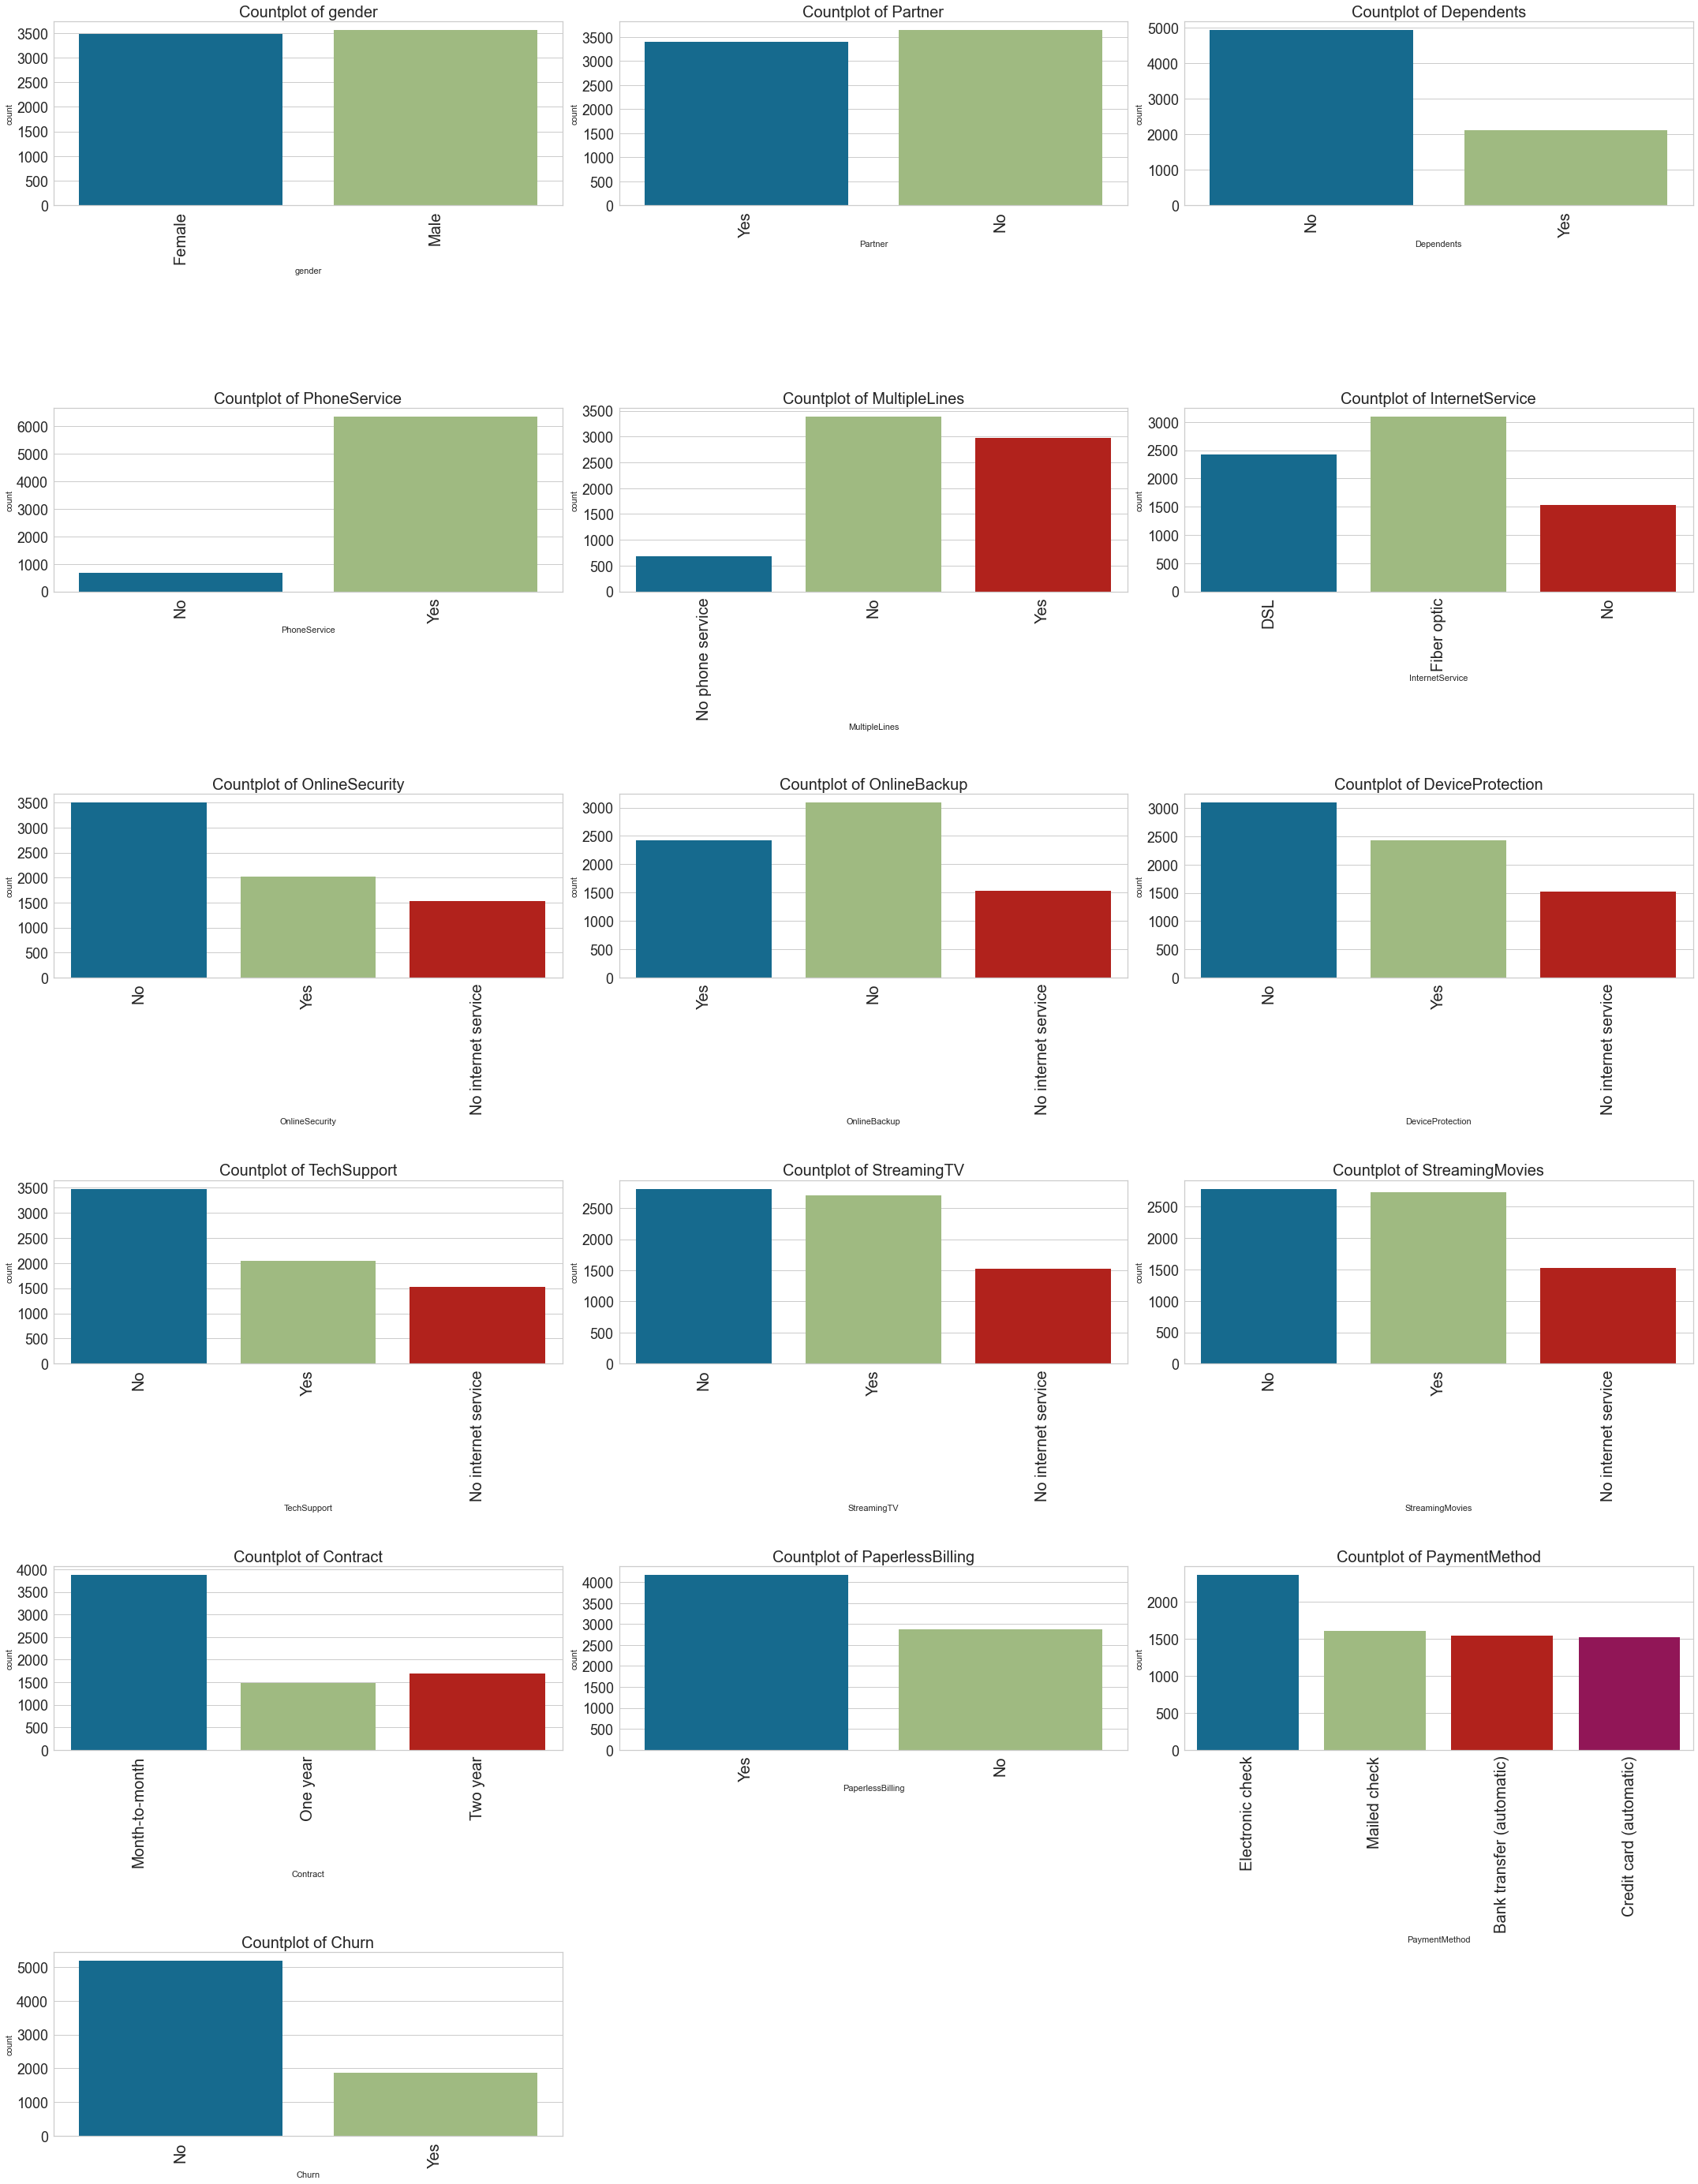

In [57]:
#checking countplot for the feature columns
col=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
     'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
     'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

plt.figure(figsize=(30,65))
for i in range(len(col)):
  plt.subplot(10,3,i+1)
  sns.countplot(df[col[i]])
  plt.title(f"Countplot of {col[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=20)
  plt.yticks(fontsize=18)
  plt.tight_layout()

Observations:
    
1.From gender plot, we see that the male count is more as compared to female.

2.From Partner plot, we see that customers having partner count is less than those without partners.

3.From the Dependents plot, we can see that Dependents has high no count than yes count.

4.From phoneservice plot, we can see that NO has less count and YES has high count.

5.From multipleline plot, we can see that No has the highest count while no phone service has the least count.

6.From internet service plot, we can see that the count of fiber optic is highest while No has the least count.

7.From onlinesecurity plot, we can see that No has high count while no internet service has the less count.

8.From onlinebackup plot, we can see that No has the highest count folowed by Yes while No internet service has the least count.

9.From device protection plot, we can see that No has the highest count while No internet service has the least count.

10.From techsupport plot, we can see that No count is high while no internet service has the least count.

11.From streamingtv plot and streaming movies plot, we can see No has the highest count and no internet service has the least count.

12.From contract plot, we can see month to month contract is more popular among the customers while one year contract is the least popular one.

13.From PaperlessBilling plot, we can see that Yes has more count indicating people use to take paperless billing more.

14-From paymentmethod plot, we can see that Electronic check count is high indicating that people use electric-check method more as compared to to others.

15.From Churn plot, we can see that No has the highest count indicating that most of the people are not interested while yes has the lowest count.

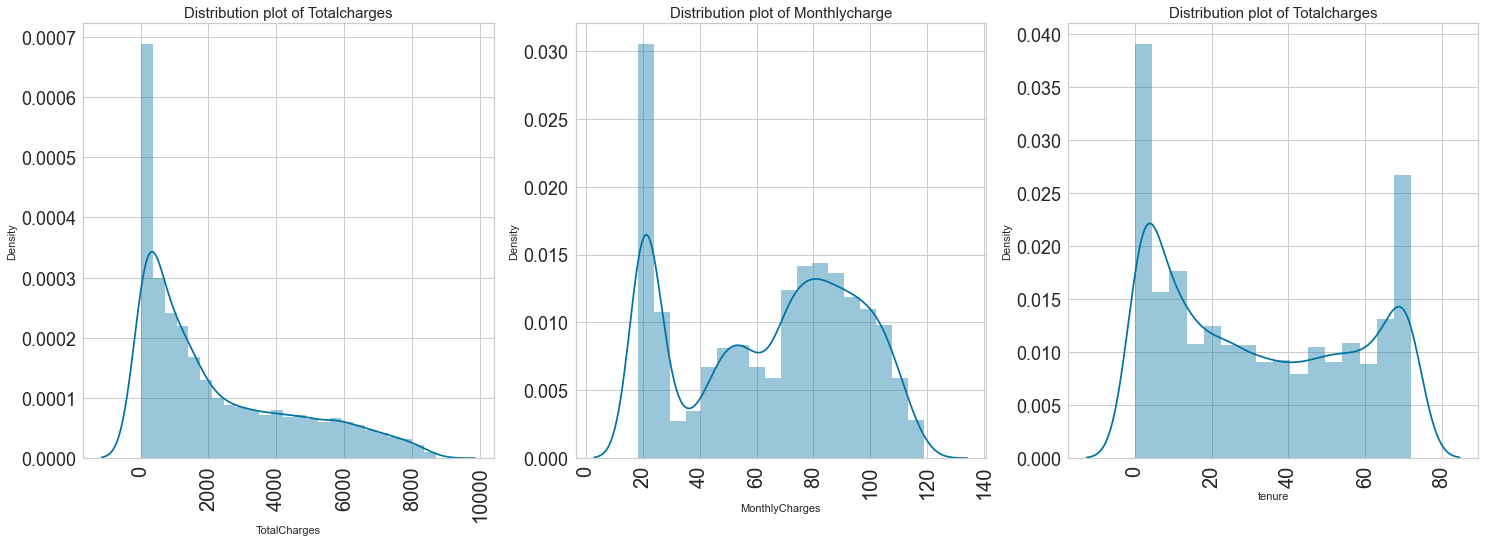

In [58]:
#checking distribution plots for continuous columns
plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
sns.distplot(df['TotalCharges'])
plt.title("Distribution plot of Totalcharges",fontsize=15)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=18)
plt.subplot(1,3,2)
sns.distplot(df['MonthlyCharges'])
plt.title("Distribution plot of Monthlycharge",fontsize=15)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=18)
plt.subplot(1,3,3)
sns.distplot(df['tenure'])
plt.title("Distribution plot of Totalcharges",fontsize=15)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=18)
plt.show()

Observations:

From Total Charges plot, we can say that-

1.Data is positively skewed

2.Customer have spent upto $8000.

3.Majority of the population spent approx $1,100.

From MonthlyCharges plot, we can see that-

1.Data is not normally distributed.

2.Maximum amount people spent was $18-$24 as they were subscribed to basic package.

3-Between 70-100 dollar, there was a large number of customers.

From tenure plot, we can see that-

1.It is Bi-Model distribution having 2 peak which means data is concentrated across two different group.

2.We have a major chunk of customers in 0-5 month period might be because lot of customers tried the service and left or liked the service and continued.

3.Between 10-65 months, we see a flat distribution of data.

4.There were lot of customers in 69-72 months range. They were the royal customers.

# Bivariate Analysis:

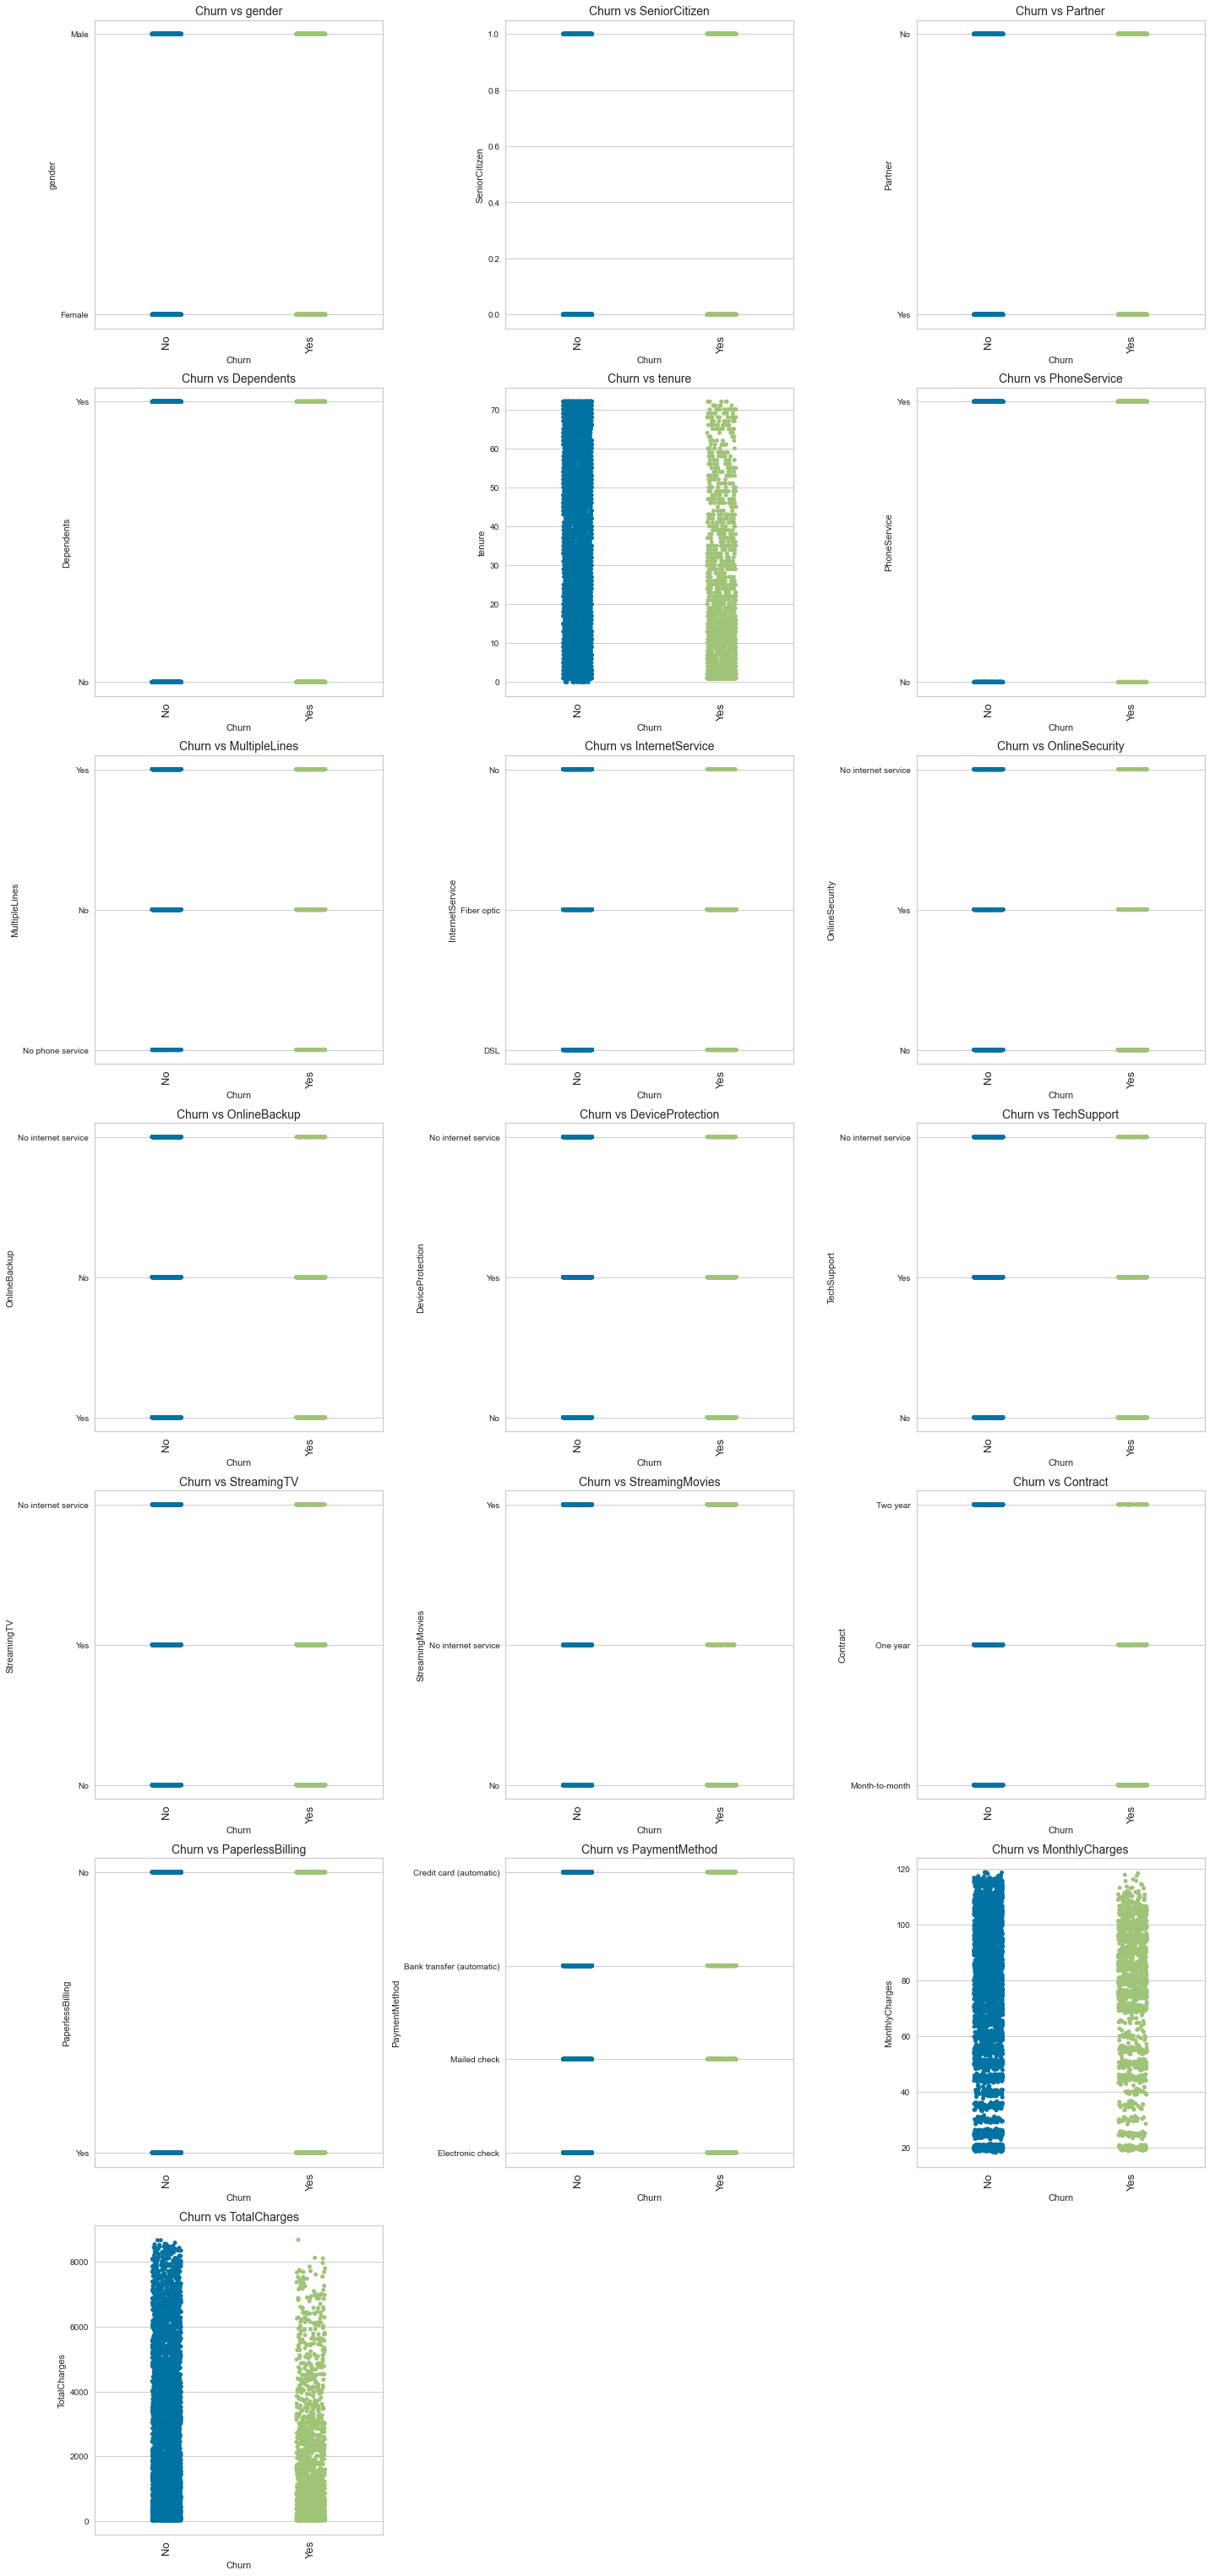

In [59]:
#checking stripplot for churn vs feature columns.
col1=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(20,60))
for i in range(len(col1)):
  plt.subplot(10,3,i+1)
  sns.stripplot(x=df['Churn'],y=df[col1[i]])
  plt.title(f"Churn vs {col1[i]}",fontsize=14)
  plt.xticks(rotation=90,fontsize=13)
  plt.tight_layout()

Observations:

1. From tenure plot, we can see that No has high values and yes has less values which indicates that tenure is effecting the churn.

2. From monthlycharges plot, we can see that No has more values and high rate whereas yes has less values indicating that churn is getting affected by monthly charges.

3. From Totalcharges plot, we can say no has high values than Yes.

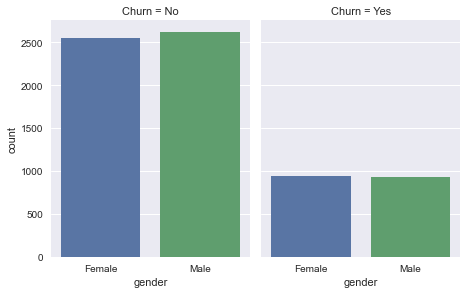

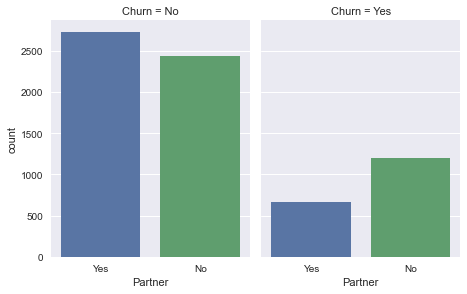

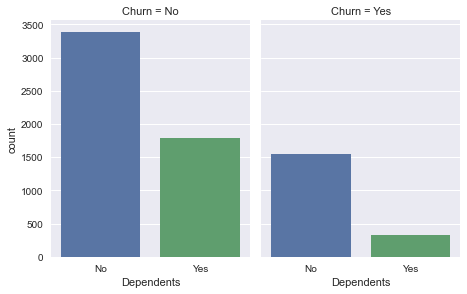

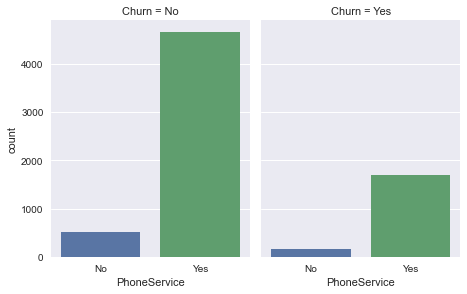

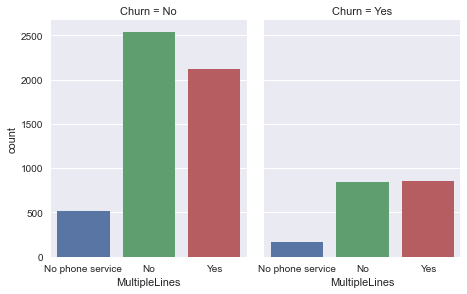

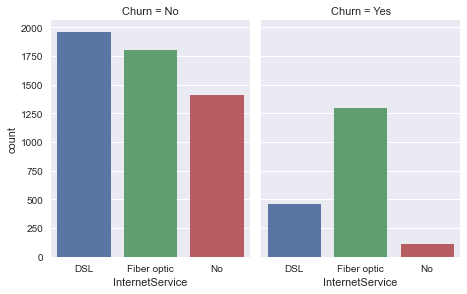

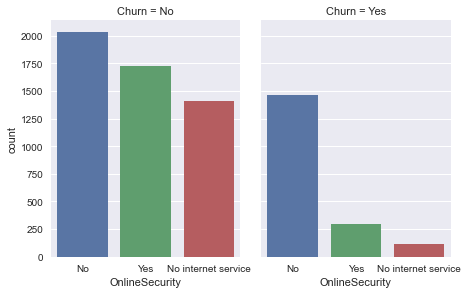

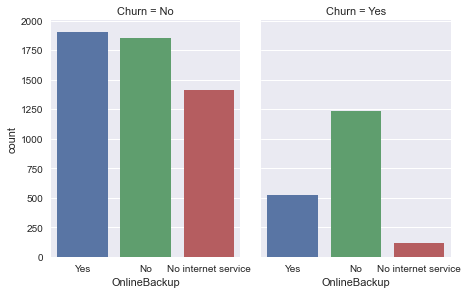

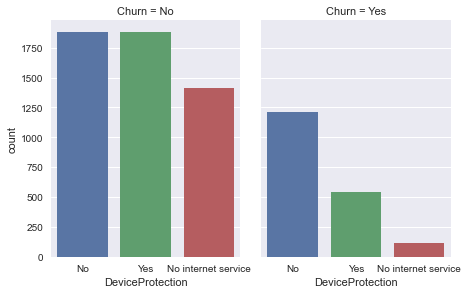

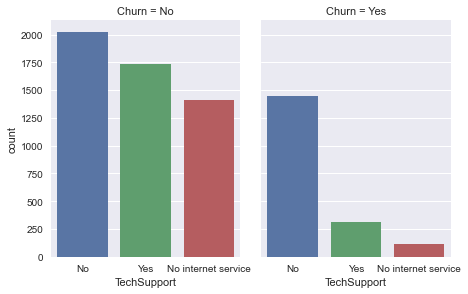

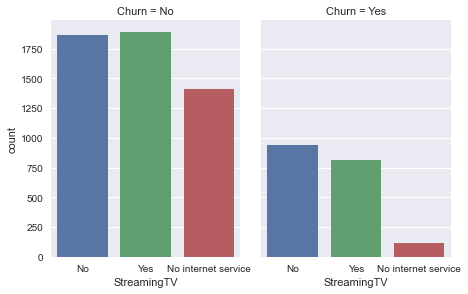

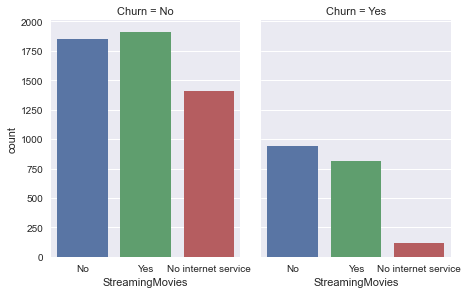

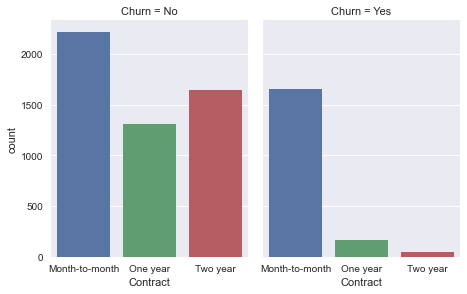

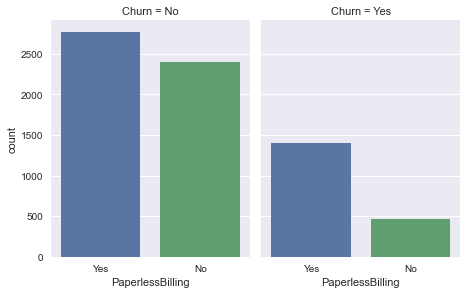

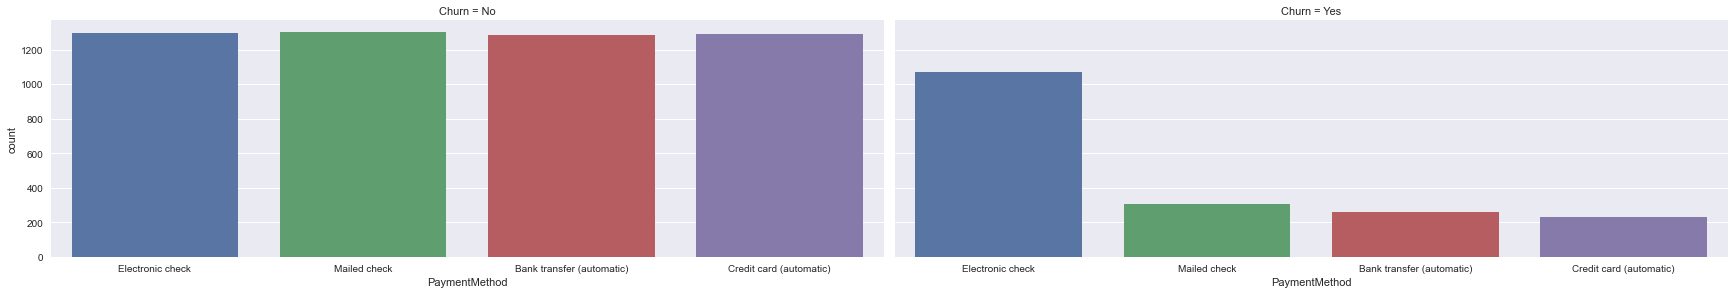

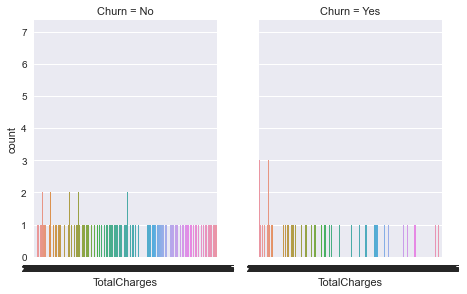

In [60]:
#Checking catplot for churn w.r.t the categorical columns
plt.style.use('seaborn')
new_df=list(df1.columns)
new_list=new_df
new_df.remove('Churn')
for col in new_list:
  if col=='PaymentMethod':
    aspect_ratio=3.0
  else:
    aspect_ratio=0.8
  plot=sns.catplot(x=col,col='Churn',data=df,kind='count',height=4,aspect=aspect_ratio)

Obseravtions:

1.From gender plot, we see that Churn has almost equal value for both the gender.

2.Customers with partner have less chance of leaving as seen from the partner plot.

3.Customer with no dependents have high chance of leaving as seen from the dependents plot.

4.From PhoneService plot, we see that Yes has high chance to churn.

5.From multiplelines plot. we can see that no phone service has less chance to churn while No and Yes has same chance to churn.

6.rom internet service plot, we can see that people with fiber optic has higher chance of leaving.

7.People with No OnlineSecurity has high chance of leaving and people with No internet service has less chance of leaving.

8.Customers with Online backup who dont have backup have high chance to churn and those who do not have internet service have very less chance to churn.

9.From device protection plot, we can see that those who don't have deviceprotection have higher chance to churn while those who have no internet service have less chance to churn.

10.People who dont have techsupport have high chance and who don't have no internet service have less chance to churn which is the case for streamingTV and streamingMovies too.

11.People having contract month-to-month have high chance to churn while people who have two year of contract have less chance to churn.

12.People who use PaperlessBilling have high chance to leave and who dont use paperbilling have less chance of leaving.

13.People who use electroniccheck as a paymentmethod have high chance of leaving and rest of all have have less chance of leaving

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

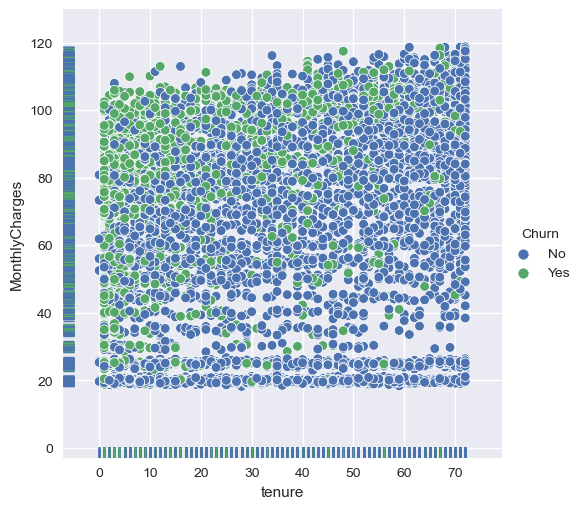

In [61]:
#Checking the relation of churn w.r.t tenure and monthlycharges
plt.style.use('default')
plt.style.use('seaborn')

sns.relplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')
sns.rugplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', legend=False)

Observation: From the above plot, we see that people in the initial months of service usage are more prone to discontinue if they are unhappy with the service offered to them and therefore strong retention on those phase is required.

<AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>

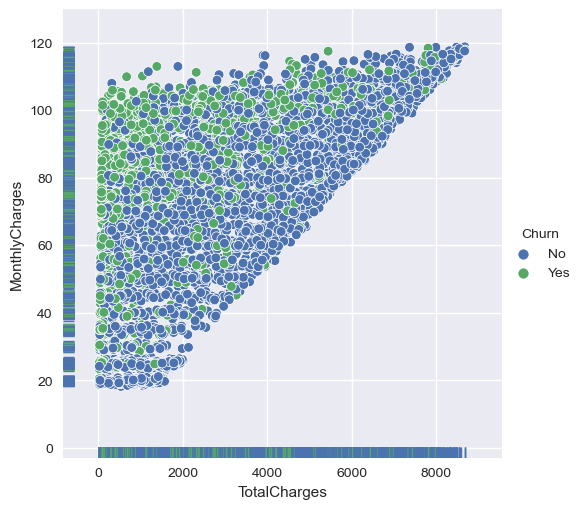

In [62]:
#checking relation of churn w.r.t Toatalcharges and Monthlycharges
sns.relplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn')
sns.rugplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn', legend=False)

Observation: From the above plot, we see that people with high monthly charges tend to leave the service. However, when a customer has chosen to stick around with the reasonable monthly charges then there is a steep increase in monthly charges with total charges.

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

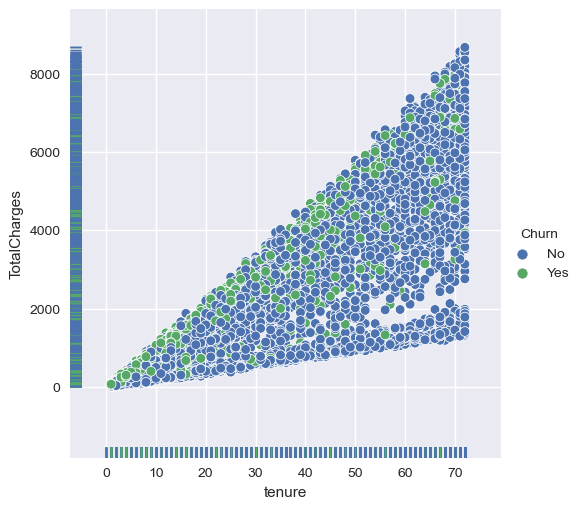

In [63]:
#checking churn w.r.t tenure and totalcharges
sns.relplot(data=df, x='tenure', y='TotalCharges', hue='Churn')
sns.rugplot(data=df, x='tenure', y='TotalCharges', hue='Churn', legend=False)

Observation: From the above plot, we can see that shows as the tenure increases the total charges increases as well and if people have chosen a high tenure to use the service then the churn criteria is low or negligible.

In [64]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


In [65]:
#checking the number of unique values categorical features have
{column:len(df[column].unique()) for column in df.columns if df[column].dtypes=='object'}

{'gender': 2,
 'Partner': 2,
 'Dependents': 2,
 'PhoneService': 2,
 'MultipleLines': 3,
 'InternetService': 3,
 'OnlineSecurity': 3,
 'OnlineBackup': 3,
 'DeviceProtection': 3,
 'TechSupport': 3,
 'StreamingTV': 3,
 'StreamingMovies': 3,
 'Contract': 3,
 'PaperlessBilling': 2,
 'PaymentMethod': 4,
 'Churn': 2}

Remarks: Here we are checking all the categorical columns to see how many unique values they have so that we can encode them.

# Encoding the feature data:

In [66]:
#Using ordinal encoder to encode the categorical columns
oe=OrdinalEncoder()
def ordinal_encode(df,column):
  df[column]=oe.fit_transform(df[column])
  return df

In [67]:
df=ordinal_encode(df,['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'])

# Feature Engineering:

In [68]:
#sorting tenurerange values into bins
df['TenureRange']=pd.cut(df['tenure'],5)
#combining the data
df[['TenureRange','Churn']].groupby(['TenureRange'],as_index=False).mean().sort_values(by='TenureRange',ascending=True)

#specifying rows and columns by their integer position values
df.loc[ df['tenure']<=8, 'TenureCat']=0
df.loc[(df['tenure']>8) & (df['tenure']<=15),'TenureCat']=1
df.loc[(df['tenure']>15) & (df['tenure']<=30),'TenureCat']=2
df.loc[(df['tenure']>30) & (df['tenure']<=45),'TenureCat']=3
df.loc[(df['tenure']>45) & (df['tenure']<=60),'TenureCat']=4
df.loc[df['tenure']>60 ,'TenureCat']=5
#checking the columns
df[['tenure','TenureRange','TenureCat']].head(10)

,tenure,TenureRange,TenureCat
0,1,"(-0.072, 14.4]",0.0
1,34,"(28.8, 43.2]",3.0
2,2,"(-0.072, 14.4]",0.0
3,45,"(43.2, 57.6]",3.0
4,2,"(-0.072, 14.4]",0.0
5,8,"(-0.072, 14.4]",0.0
6,22,"(14.4, 28.8]",2.0
7,10,"(-0.072, 14.4]",1.0
8,28,"(14.4, 28.8]",2.0
9,62,"(57.6, 72.0]",5.0


In [69]:
df['MonthlyChargesRange']=pd.cut(df['MonthlyCharges'],5)
df[['MonthlyChargesRange','Churn']].groupby(['MonthlyChargesRange'],as_index=False).mean().sort_values(by='MonthlyChargesRange',ascending=True)

df.loc[df['MonthlyCharges']<=20,'MonthlyChargeCat']=0
df.loc[(df['MonthlyCharges']>20) & (df['MonthlyCharges']<=40),'MonthlyChargeCat']=1
df.loc[(df['MonthlyCharges']>40) & (df['MonthlyCharges']<=60),'MonthlyChargeCat']=2
df.loc[(df['MonthlyCharges']>60) & (df['MonthlyCharges']<=80),'MonthlyChargeCat']=3
df.loc[(df['MonthlyCharges']>80) & (df['MonthlyCharges']<=100),'MonthlyChargeCat']=4
df.loc[df['MonthlyCharges']>100,'MonthlyChargeCat']=5

df[['MonthlyCharges','MonthlyChargesRange','MonthlyChargeCat']].head(10)

,MonthlyCharges,MonthlyChargesRange,MonthlyChargeCat
0,29.85,"(18.15, 38.35]",1.0
1,56.95,"(38.35, 58.45]",2.0
2,53.85,"(38.35, 58.45]",2.0
3,42.30,"(38.35, 58.45]",2.0
4,70.70,"(58.45, 78.55]",3.0
5,99.65,"(98.65, 118.75]",4.0
6,89.10,"(78.55, 98.65]",4.0
7,29.75,"(18.15, 38.35]",1.0
8,104.80,"(98.65, 118.75]",5.0
9,56.15,"(38.35, 58.45]",2.0


In [70]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureRange,TenureCat,MonthlyChargesRange,MonthlyChargeCat
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,...,0.0,1.0,2.0,29.85,29.850000,0.0,"(-0.072, 14.4]",0.0,"(18.15, 38.35]",1.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,...,1.0,0.0,3.0,56.95,1889.500000,0.0,"(28.8, 43.2]",3.0,"(38.35, 58.45]",2.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,...,0.0,1.0,3.0,53.85,108.150002,1.0,"(-0.072, 14.4]",0.0,"(38.35, 58.45]",2.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,...,1.0,0.0,0.0,42.30,1840.750000,0.0,"(43.2, 57.6]",3.0,"(38.35, 58.45]",2.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,2.0,70.70,151.649994,1.0,"(-0.072, 14.4]",0.0,"(58.45, 78.55]",3.0


In [71]:
#dropping these columns since they are useless for our model prediction
df.drop(['MonthlyChargesRange','TenureRange'],axis=1,inplace=True)

In [72]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
TenureCat            0
MonthlyChargeCat     0
dtype: int64

# Splitting the data into dependent and independent variables:

In [73]:
def preprocess(df):
  df=df.copy()
#filling the null values in the TotalCharges column with its mean
  df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())
#splitting the data
  X=df.drop(['Churn'],axis=1)
  y=df['Churn']
  return X,y

In [74]:
X,y=preprocess(df)

# Multivariate Analysis:

<AxesSubplot:>

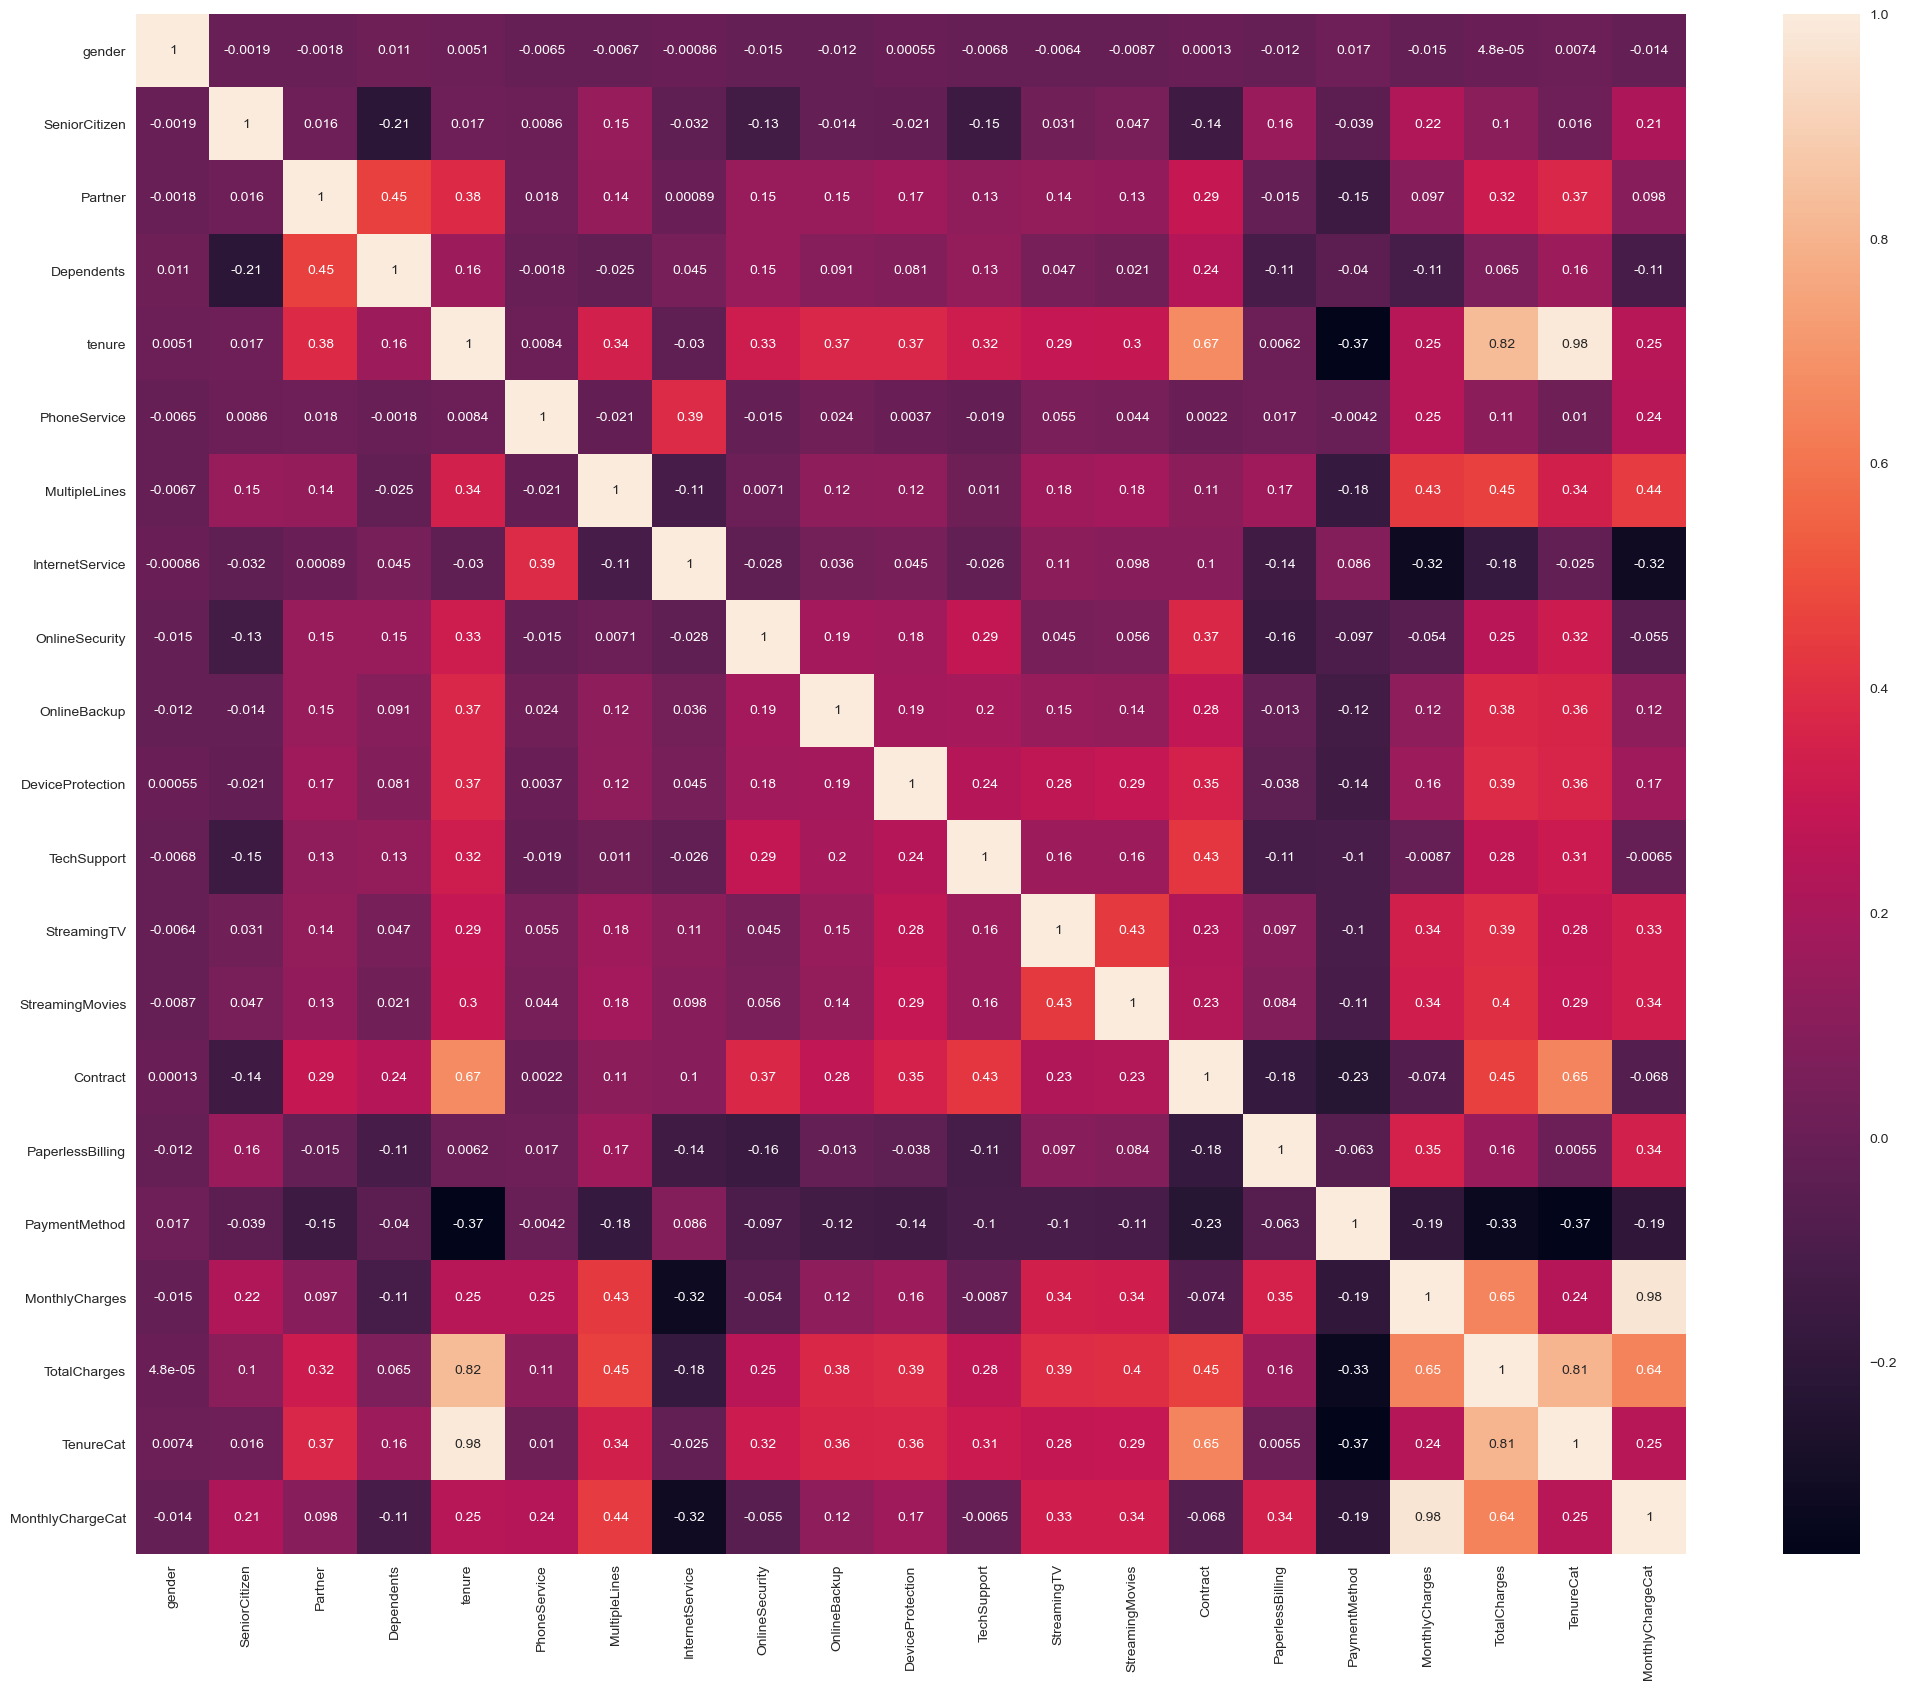

In [75]:
#Checking Correlation using heatmap
plt.figure(figsize=(25,20))
X_corr=X.corr()
sns.heatmap(X_corr,annot=True)

Remarks: In the above heatmap, we can see the correlation details plus we can also determine that there is no multicollinearity issue between our columns.

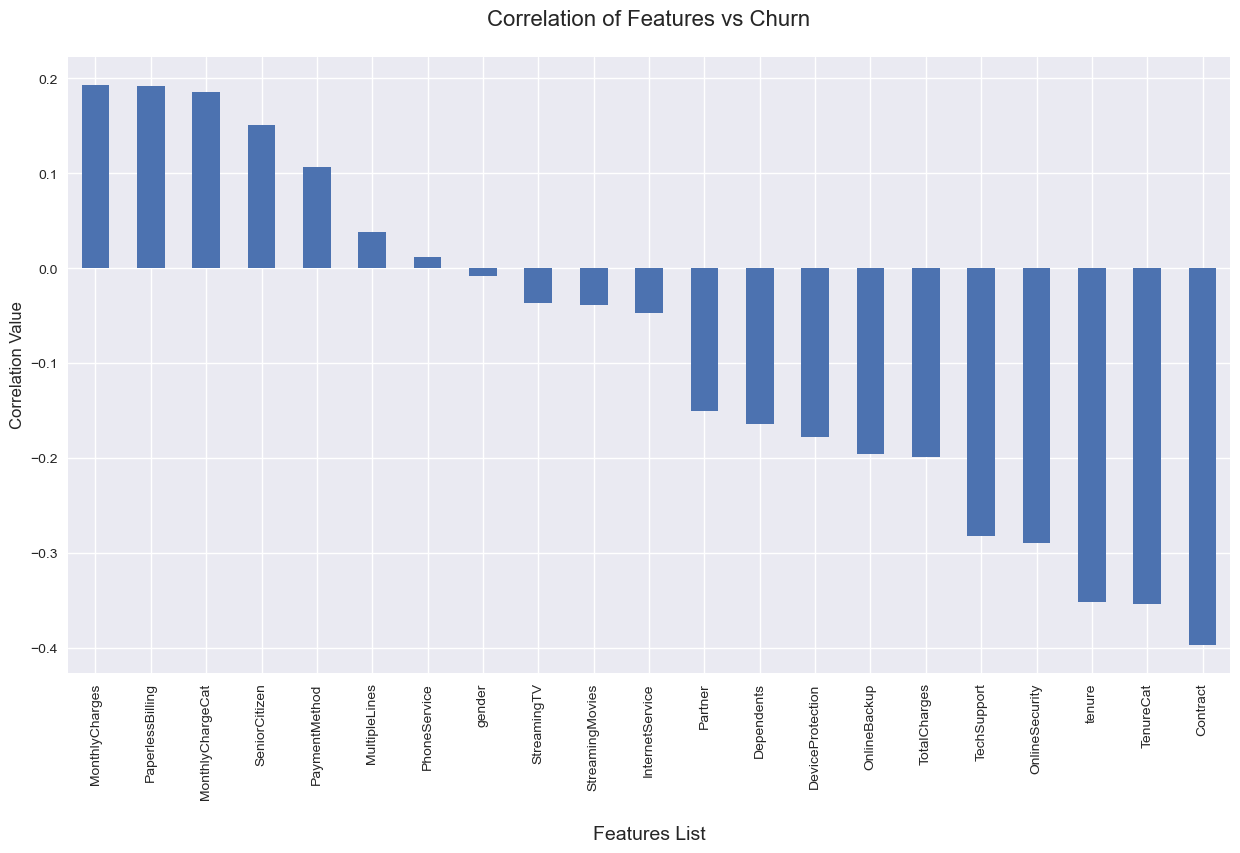

In [76]:
#checking correlation of feature columns with target label using barplot
df_corr = df.corr()
plt.figure(figsize=(15,8))
df_corr['Churn'].sort_values(ascending=False).drop('Churn').plot.bar()
plt.title("Correlation of Features vs Churn\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Remarks: Here, we have generated this barplot to have a clear vision of positive and negative correlated column feature columns w.r.t our target label and we can see that columns like monthlycharges, paperlessbilling, seniorcitizen, paymentmethod, multiplelines and phoneservice are positively correlated with our target label churn while all the remaining features are negatively correlated.

In [77]:
x=X

# Checking Outliers:

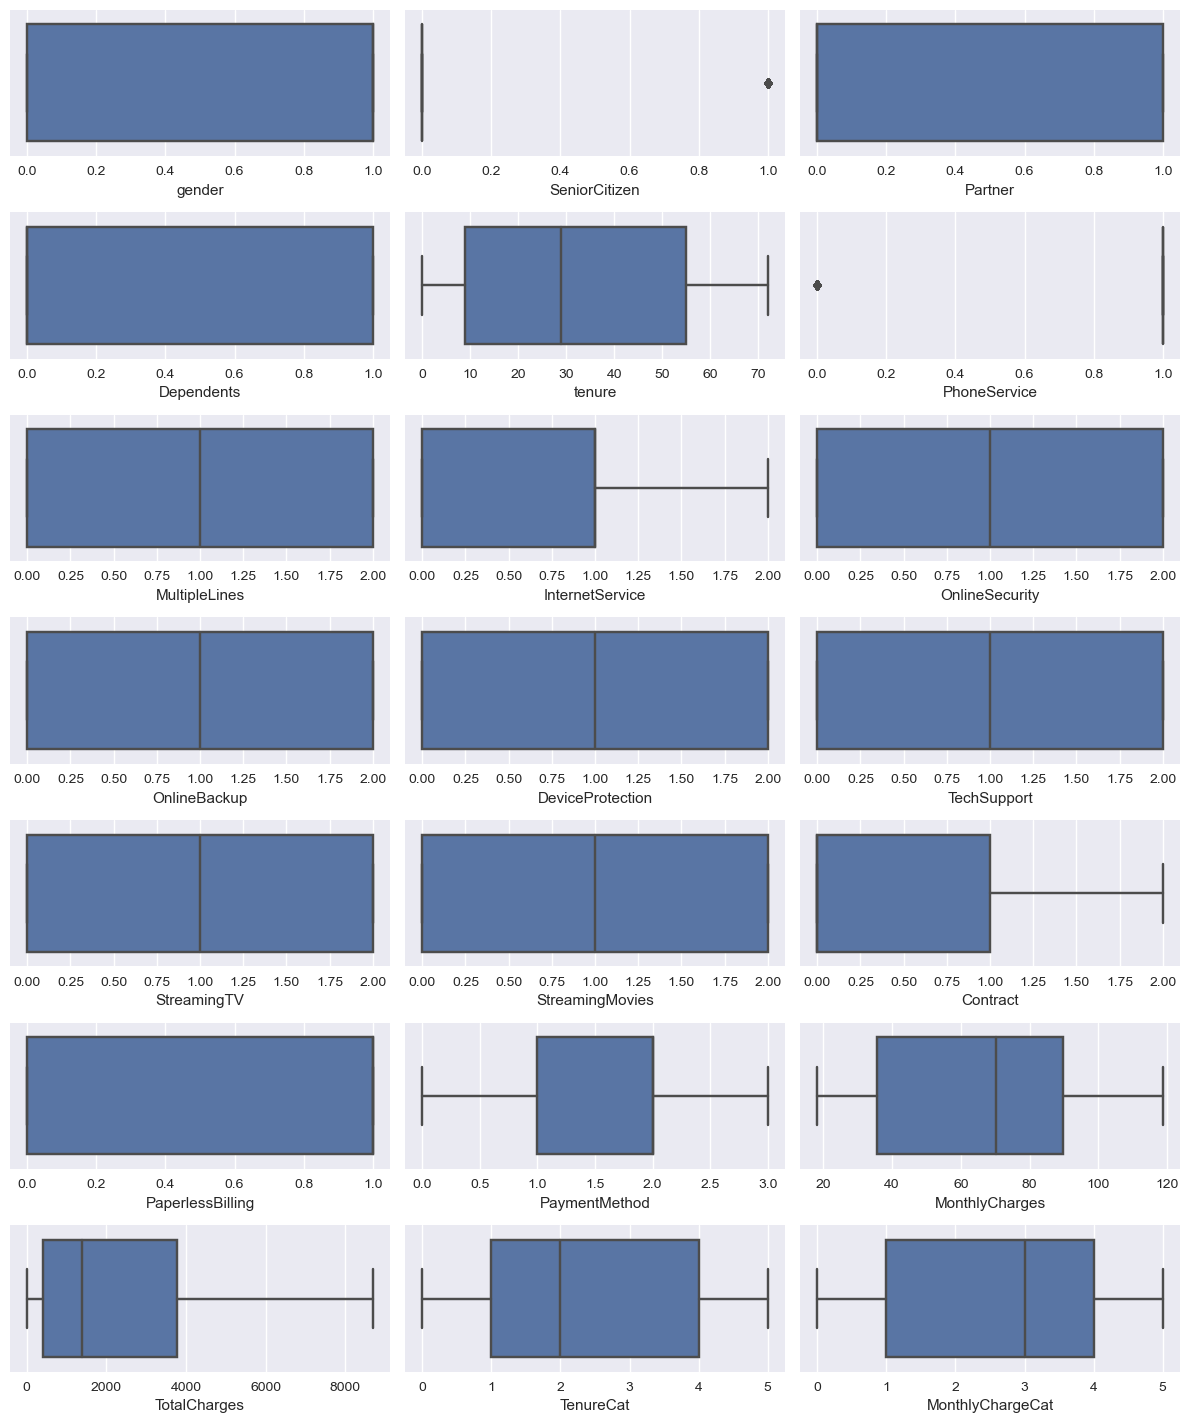

In [78]:
#checking outliers using boxplots
X_val=X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
  plt.subplot(10,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()


Observation: From the above boxplots, we see that there are no outliers present in our dataset.

# Balancing the data:


In [79]:
#since our dataset is imbalanced, we are gonna balance it using over-sampling method.
def data_balancing(X,y):
  x=X
  smote=SMOTE(random_state=42)
  X_res,y_res=smote.fit_resample(X,y)
  X_new=pd.DataFrame(X_res,columns=x.columns)
  y_new=pd.DataFrame(y_res,columns=['Churn'])
  return X_new,y_new

In [80]:
#our data is imbalanced so we have to balance it to build a better model
X_new,y_new=data_balancing(X,y)

Text(0.5, 1.0, 'Balanced Data')

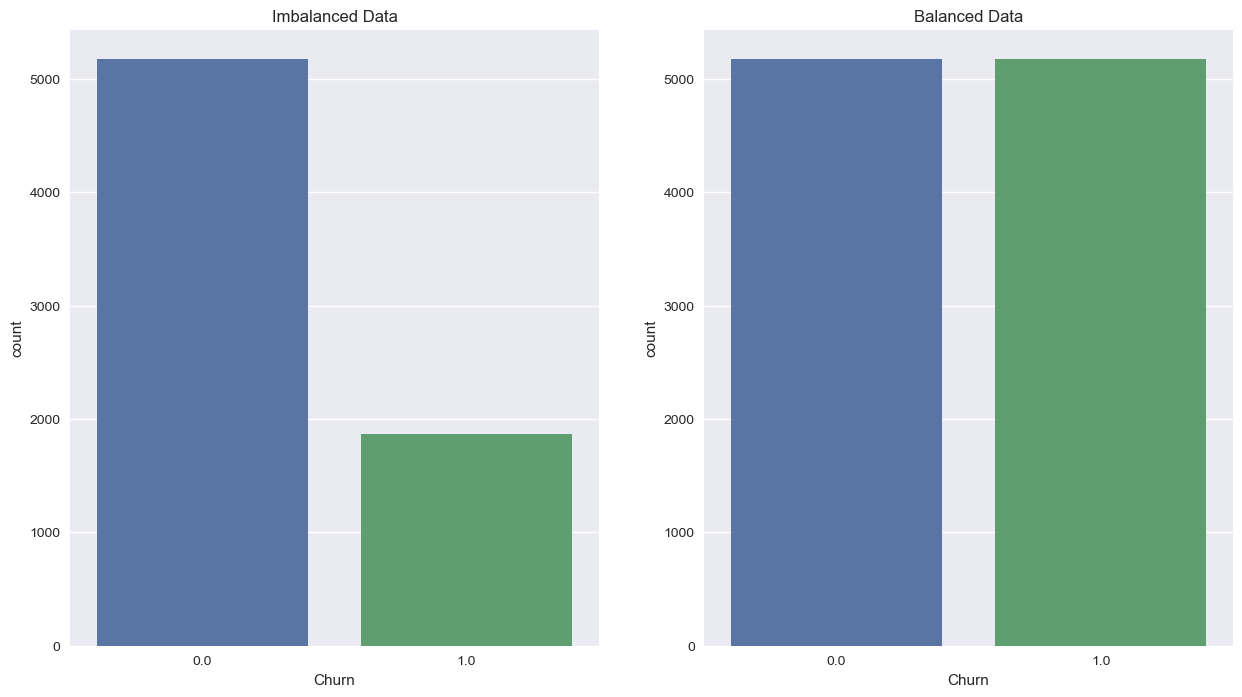

In [81]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(df['Churn'])
plt.title("Imbalanced Data")
plt.subplot(1,2,2)
sns.countplot(y_new['Churn'])
plt.title("Balanced Data")

Remarks: We can see from the above plot that the data is balanced.

# Checking skewness:

In [82]:
X_new.skew()

gender              0.005860
SeniorCitizen       2.136515
Partner             0.241716
Dependents          1.094992
tenure              0.512430
PhoneService       -2.818153
MultipleLines       0.072753
InternetService     0.189872
OnlineSecurity      0.710947
OnlineBackup        0.384585
DeviceProtection    0.374154
TechSupport         0.703048
StreamingTV         0.060581
StreamingMovies     0.064034
Contract            1.097398
PaperlessBilling   -0.612933
PaymentMethod      -0.309646
MonthlyCharges     -0.431284
TotalCharges        1.116392
TenureCat           0.278961
MonthlyChargeCat   -0.425903
dtype: float64

Remarks: Here, only one numerical column 'totalcharges' is skewed so we would use log transformation to remove the skewness while the other columns that are skewed are categorical, so we don't need to remove them.

In [83]:
#using log transform to remove skewness
X_new['TotalCharges']=np.log1p(X_new['TotalCharges'])

# Feature Scaling:

In [84]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_new,columns=x.columns)

# Splitting data for model building using train test split:

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

# Training the models:

In [86]:
models={
    "ExtraTrees  Classifier":ExtraTreesClassifier(),
    "RandomForest  Classifier":RandomForestClassifier(),
    "Logistic  Regression":LogisticRegression(),
    "DecisionTree  Classifier":DecisionTreeClassifier(),
    "XGB  Classifier":XGBClassifier(),
    "LGBM  Classifier":LGBMClassifier()
}

# Finding the best model:

*************************************************** ExtraTrees  Classifier ************************************************************
ACCURACY SCORE 0.8628019323671497


Cross Val Score 85.88132613248716


Confusion metrics
[[1386  188]
 [ 238 1293]]


Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      1574
         1.0       0.87      0.84      0.86      1531

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



Roc Auc Curve


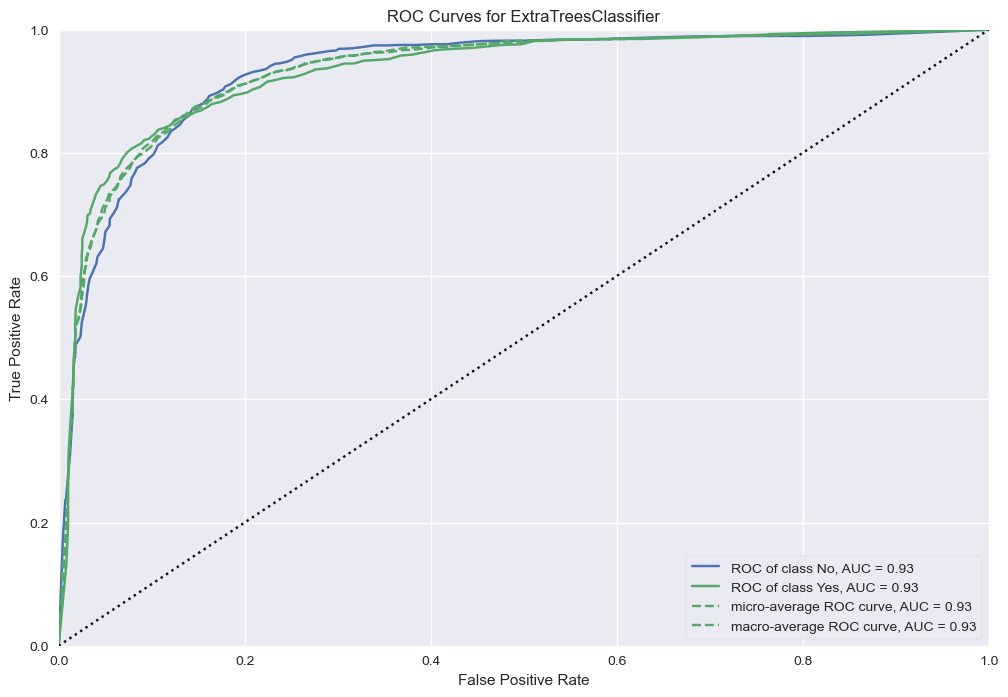

Model Learning Curve


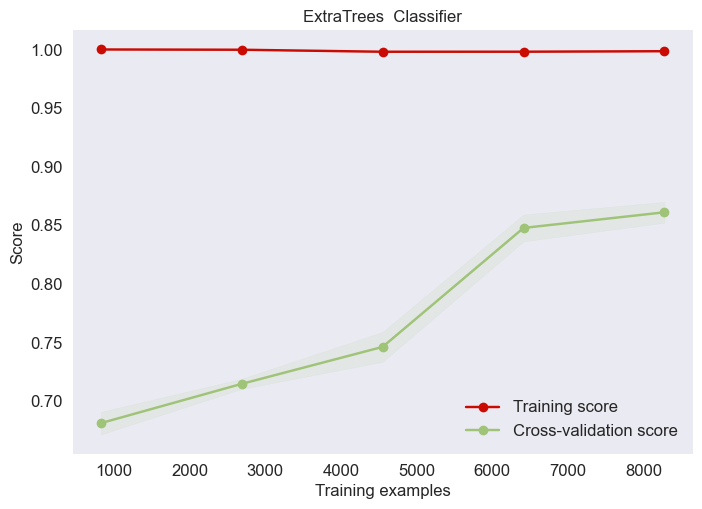

*************************************************** RandomForest  Classifier ************************************************************
ACCURACY SCORE 0.8599033816425121


Cross Val Score 85.82331308970937


Confusion metrics
[[1401  173]
 [ 262 1269]]


Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1574
         1.0       0.88      0.83      0.85      1531

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



Roc Auc Curve


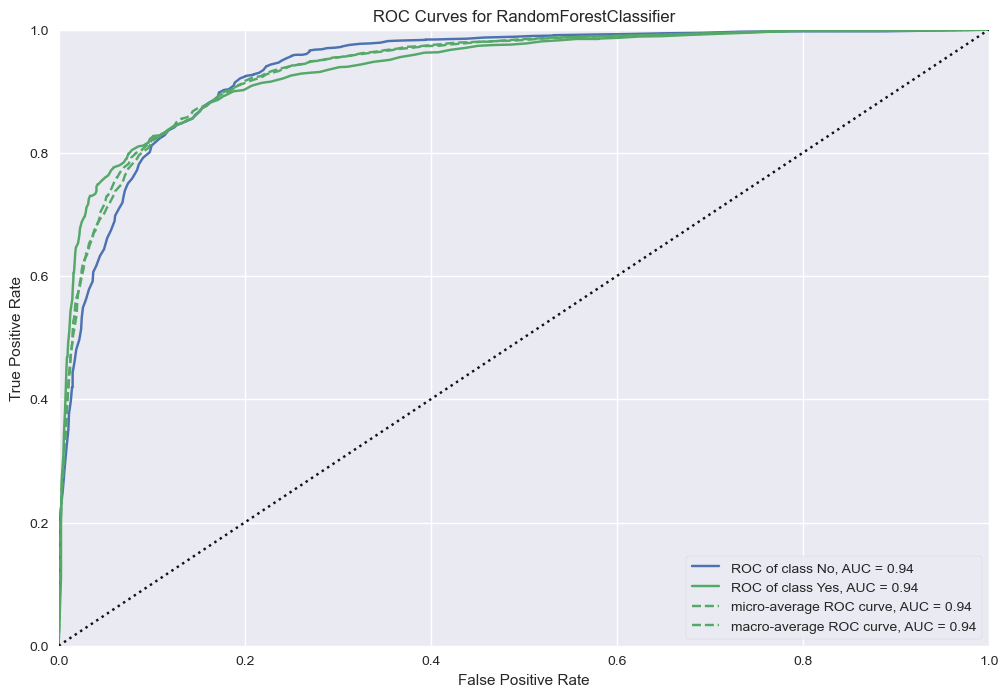

Model Learning Curve


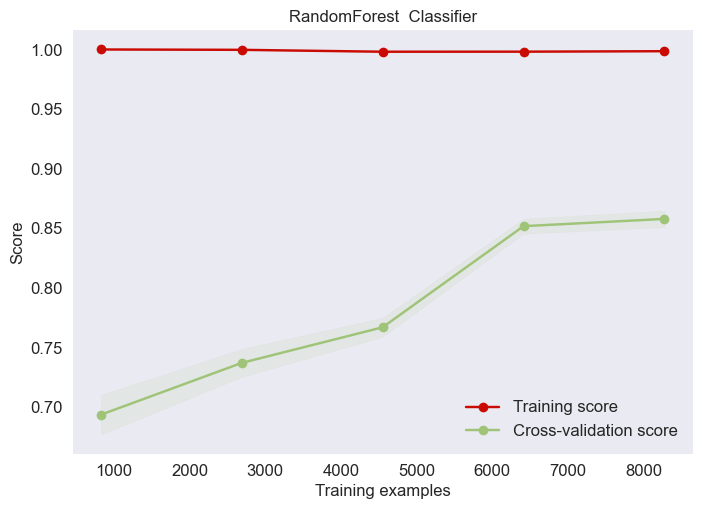

*************************************************** Logistic  Regression ************************************************************
ACCURACY SCORE 0.784219001610306


Cross Val Score 77.32884097664395


Confusion metrics
[[1178  396]
 [ 274 1257]]


Classification Report
              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78      1574
         1.0       0.76      0.82      0.79      1531

    accuracy                           0.78      3105
   macro avg       0.79      0.78      0.78      3105
weighted avg       0.79      0.78      0.78      3105



Roc Auc Curve


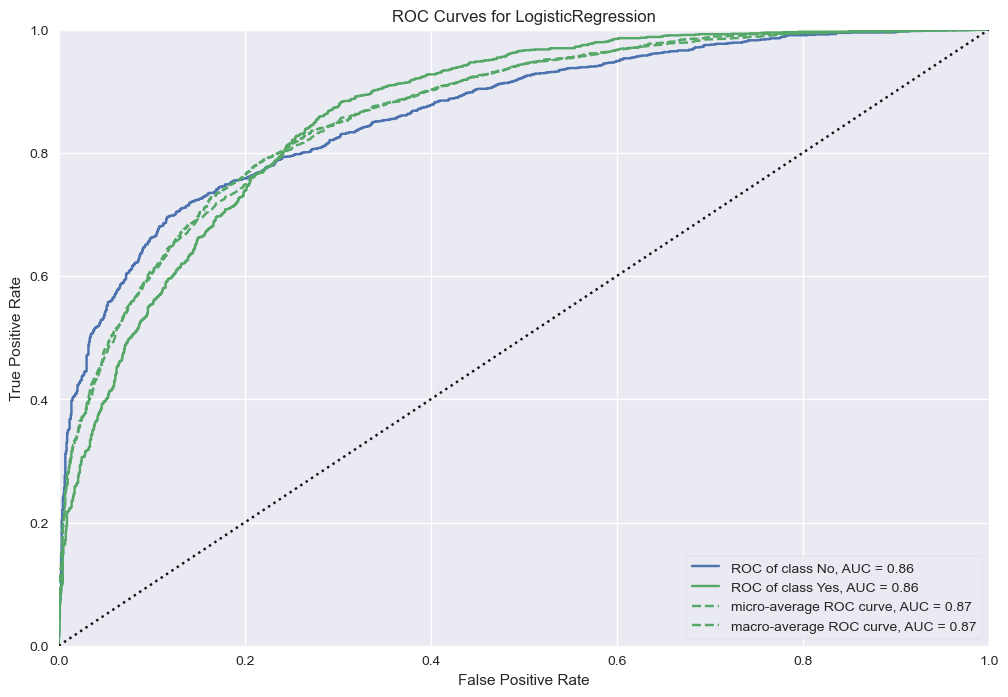

Model Learning Curve


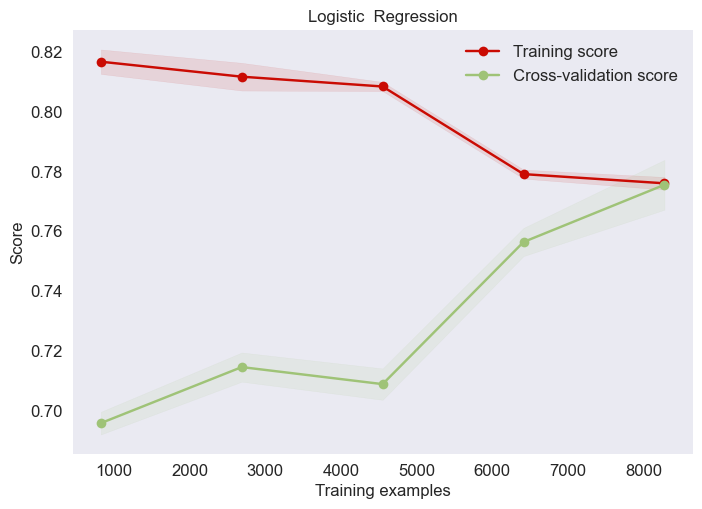

*************************************************** DecisionTree  Classifier ************************************************************
ACCURACY SCORE 0.7971014492753623


Cross Val Score 80.46010698533446


Confusion metrics
[[1251  323]
 [ 307 1224]]


Classification Report
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80      1574
         1.0       0.79      0.80      0.80      1531

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



Roc Auc Curve


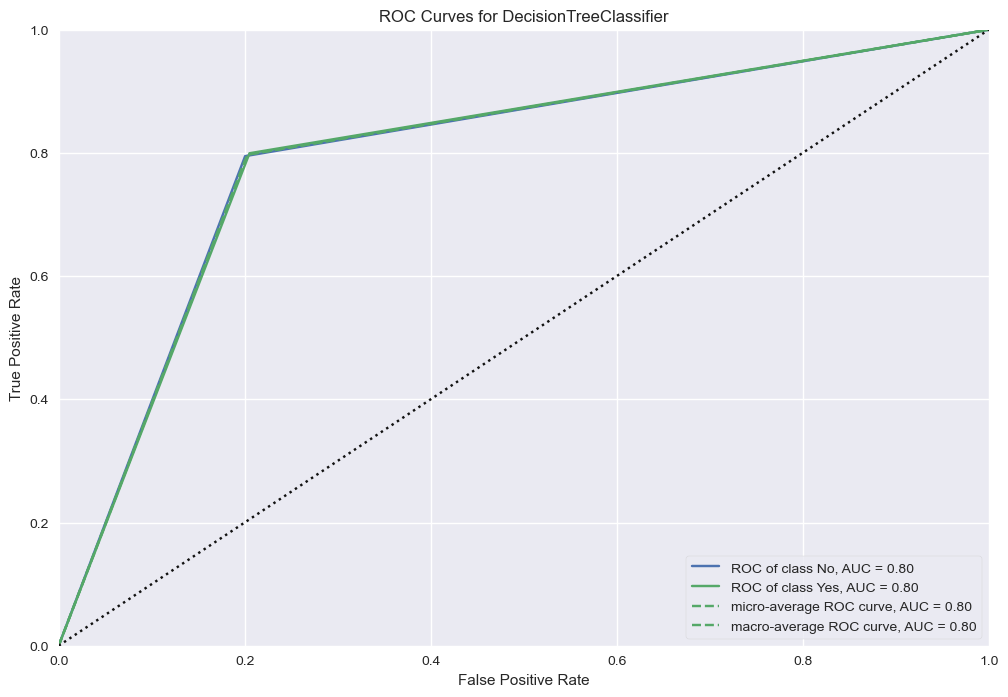

Model Learning Curve


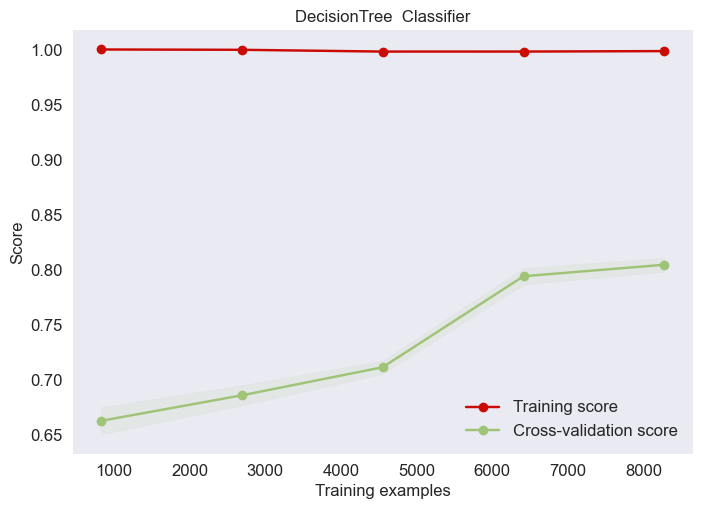

*************************************************** XGB  Classifier ************************************************************
[05:31:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ACCURACY SCORE 0.8541062801932368
[05:31:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:31:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from

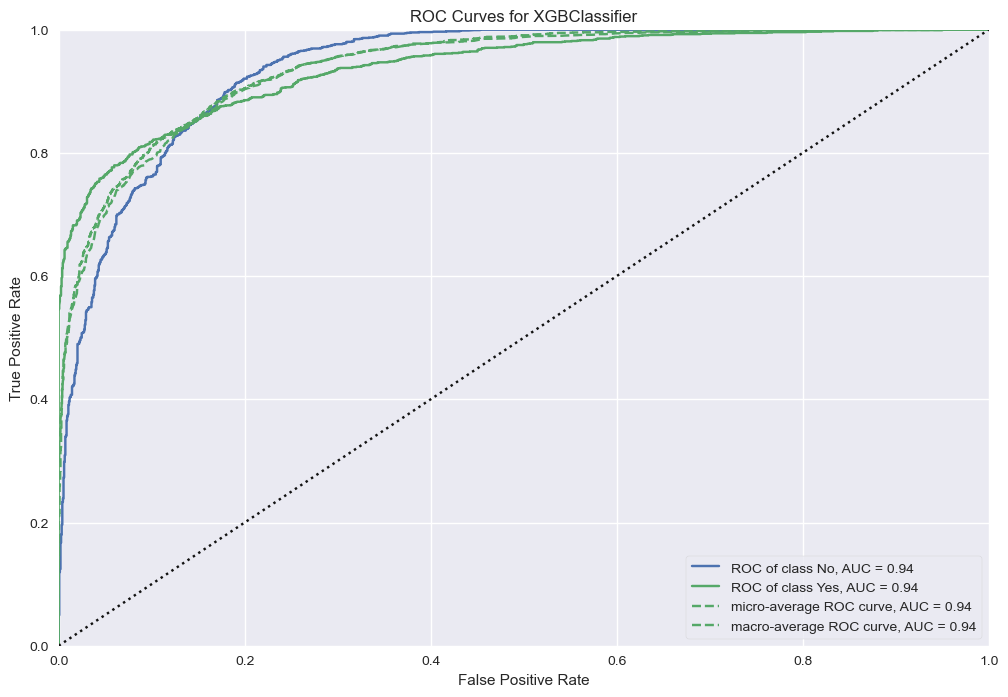

Model Learning Curve
[05:31:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:31:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:31:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:31:28] WARNING: C:/Users/Administrator/worksp

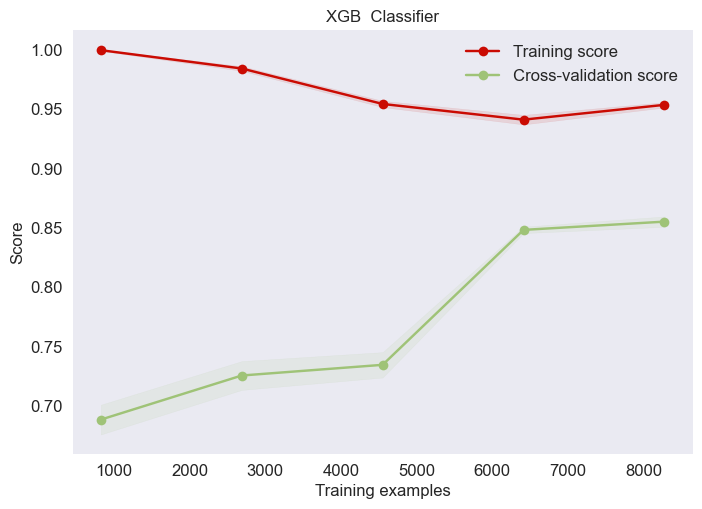

*************************************************** LGBM  Classifier ************************************************************
ACCURACY SCORE 0.8650563607085346


Cross Val Score 86.01672725744424


Confusion metrics
[[1406  168]
 [ 251 1280]]


Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1574
         1.0       0.88      0.84      0.86      1531

    accuracy                           0.87      3105
   macro avg       0.87      0.86      0.86      3105
weighted avg       0.87      0.87      0.86      3105



Roc Auc Curve


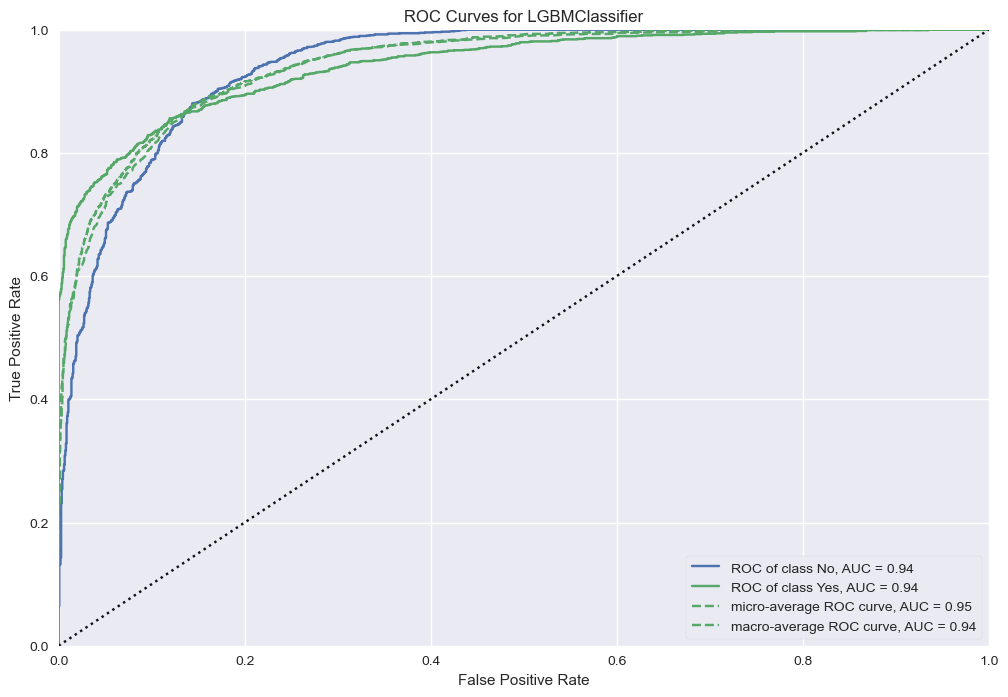

Model Learning Curve


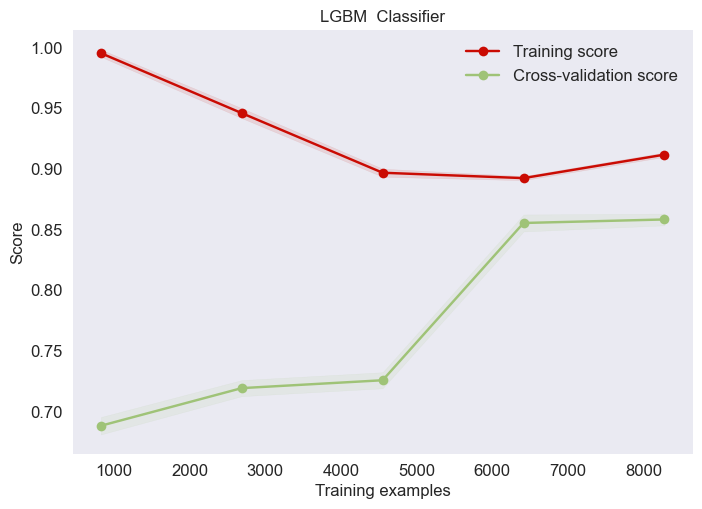

In [87]:
NAME=[]
CVS=[]
ACCURACY_SCORE=[]
skf=StratifiedKFold(n_splits=5,shuffle=True)
for name,model in models.items():
  print("***************************************************",name,"************************************************************")
  NAME.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  ACCURACY_SCORE.append(accuracy)
  print("ACCURACY SCORE",accuracy)
  cvs=cross_val_score(model,X_new,y_new,scoring='accuracy',cv=skf).mean()
  CVS.append(cvs)
  print("\n")
  print("Cross Val Score",cvs*100)
  cm=confusion_matrix(y_test,y_pred)
  print("\n")
  print("Confusion metrics")
  print(cm)
  report=classification_report(y_test,y_pred)
  print("\n")
  print("Classification Report")
  print(report)
  print("\n")
  print("Roc Auc Curve")
  plt.figure(figsize=(12,8))
  roc_auc(model,X_train,y_train,X_test=X_test,y_test=y_test,classes=["No","Yes"],micro=True,macro=True)
  print("Model Learning Curve")
  skplt.estimators.plot_learning_curve(model,X_new,y_new,cv=skf,scoring='accuracy',text_fontsize='large',title=name)
  plt.show()

Remarks: We are selecting LGBM Classifier as it is giving good metrics and cross_val_Score of 85.86.

# Hyperparameter tuning our best ML model:

In [101]:
lgbm=LGBMClassifier()

In [102]:
params={'boosting_type': ['gbdt','dart','goss'],
 'importance_type': ['split','gain'],
 'max_depth': [-1,None,1,2,3],
 'n_estimators': [100,200,500]
}

Remarks: Listing down the chosen parameters above after selecting LGBMClassifier as our best model.

In [103]:
Grid=GridSearchCV(estimator=lgbm,param_grid=params,scoring='accuracy',n_jobs=-1,cv=skf)

Remarks: Using the Grid Search CV method for hyperparameter tuning of the best model.

In [104]:
Grid.fit(X_new,y_new)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss'],
                         'importance_type': ['split', 'gain'],
                         'max_depth': [-1, None, 1, 2, 3],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

Remarks: We have trained the Grid Search CV with the list of parameters we think it should check for best possible outcomes

In [105]:
Grid.best_params_

{'boosting_type': 'dart',
 'importance_type': 'split',
 'max_depth': 3,
 'n_estimators': 500}

Remarks: In the above cell, the Grid Search CV has provided the best parameters list out of all the combinations it used to train the model

In [106]:
Grid.best_score_

0.8616168748234229

Remarks: After successfully incorporating the HyperParameter Tuning on the final Model, we have received the accuracy score of 86.16%.

In [107]:
LGBM=LGBMClassifier(boosting_type= 'dart',
 importance_type= 'split',
 max_depth= 3,
 n_estimators= 500)

# Final Model ROC_AUC curve and Model Learning Curve:

Roc_Auc Curve


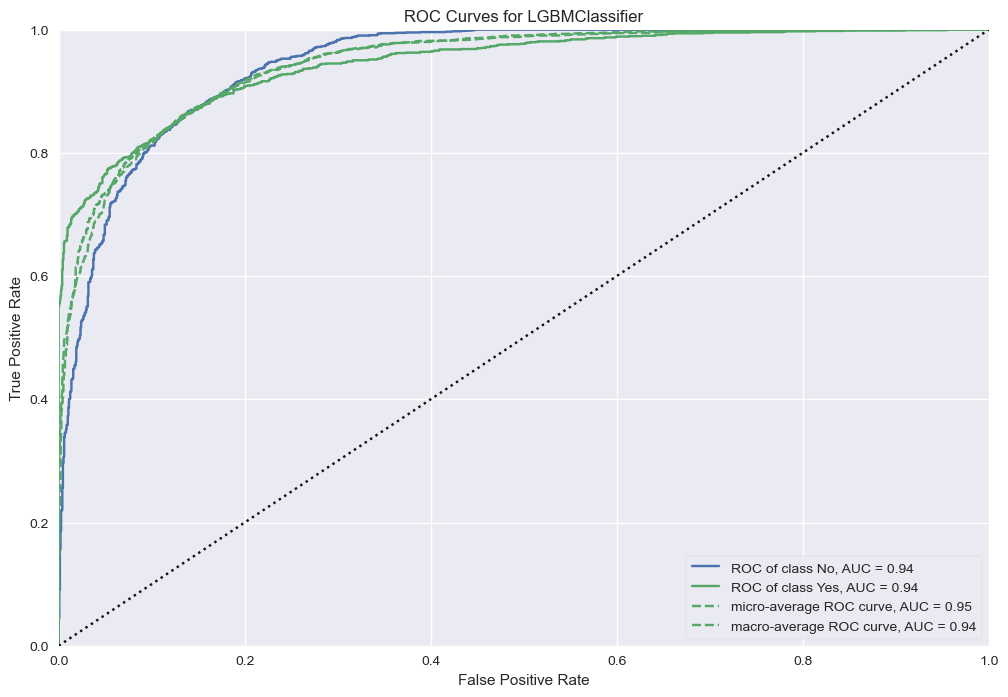

Model Learning Curve


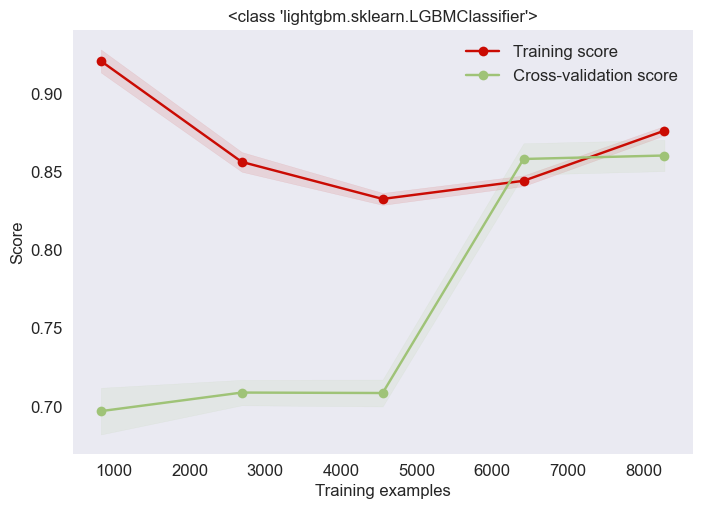

In [108]:
print("Roc_Auc Curve")
plt.figure(figsize=(12,8))
roc_auc(LGBM,X_train,y_train,X_test=X_test,y_test=y_test,classes=["No","Yes"],micro=True,macro=True)
print("Model Learning Curve")
skplt.estimators.plot_learning_curve(LGBM,X_new,y_new,cv=skf,scoring='accuracy',text_fontsize='large',title=LGBMClassifier)
plt.show()

# Final Model metrics:

In [109]:
LGBM.fit(X_train,y_train)
Y_Pred=LGBM.predict(X_test)

In [110]:
print("Accuracy_score",accuracy_score(y_test,Y_Pred))
print("Confusion matrix")
print('\n')
print(confusion_matrix(y_test,Y_Pred))
print('\n')
print("Classification Report")
print("\n")
print(classification_report(y_test,Y_Pred))

Accuracy_score 0.8628019323671497
Confusion matrix


[[1378  196]
 [ 230 1301]]


Classification Report


              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      1574
         1.0       0.87      0.85      0.86      1531

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



# Saving the model:

In [111]:
joblib.dump(Grid,"Churn_Prediction.obj")

['Churn_Prediction.obj']

# Loading the model:

In [112]:
model=joblib.load('Churn_Prediction.obj')

In [113]:
model.predict(X_test)

array([1., 0., 0., ..., 0., 1., 0.])

# Conclusion:

1. In this dataset, we were asked to predict the customer churn which is either Yes or No.

2. We analyzed the dataset firstly and then we performed EDA to understand the effect of features on our target label.

3. We selected those who have partner and who have dependents because they have less chance of leaving.

4. We found that churn is equal for both female and male as we cannot say that females are leaving more or males are.

5. We also seen that if people have online security and backup, and have techsupport they wouldn't leave.

6. In case of people using paperlessbilling and electroniccheck, they are found to have high chance at leaving and people who have contract month-to-month, they have a very high chance of leaving.

7. The data was found to be imbalanced so we used the balancing technique to balance the data by over-sampling the data.

8. We performed model buildling using many models and we found that LGBM was giving good matrix so we selected LGBM model and performed hyperparameter tuning to increase the accuracy.

9. The final model accuracy was found to be 91.45% and then we saved the final ML model.